## Step 1: Import the data to clean

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata'

In [4]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sunillandge
Your Kaggle Key: ··········


100%|██████████| 10.5M/10.5M [00:00<00:00, 213MB/s]

In [5]:
import os

In [6]:
dataname = './airbnbopendata'

In [7]:
os.listdir(dataname)

['Airbnb_Open_Data.csv']

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('airbnbopendata/Airbnb_Open_Data.csv', low_memory=False)
#or "engine='python"

In [10]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


## Step 2: Cleanup

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [12]:
df.isnull().mean()

id                                0.000000
NAME                              0.002437
host id                           0.000000
host_identity_verified            0.002817
host name                         0.003957
neighbourhood group               0.000283
neighbourhood                     0.000156
lat                               0.000078
long                              0.000078
country                           0.005185
country code                      0.001277
instant_bookable                  0.001023
cancellation_policy               0.000741
room type                         0.000000
Construction year                 0.002086
price                             0.002407
service fee                       0.002661
minimum nights                    0.003986
number of reviews                 0.001784
last review                       0.154904
reviews per month                 0.154768
review rate number                0.003177
calculated host listings count    0.003109
availabilit

In [13]:
#drop columns with more than 50% missing values
print(df.columns[df.isnull().mean() > 0.5], '\n')

Index(['house_rules', 'license'], dtype='object') 



In [14]:
df = df.drop(df.columns[df.isnull().mean() > 0.5], axis=1)

In [15]:
#Remove unnecessary columns
df.drop(columns=['host id','country','country code'],axis=1,inplace=True)

In [16]:
#correcting columns' names
df.columns=[col.lower().replace(' ','_') for col in df.columns]
df.columns

Index(['id', 'name', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [17]:
df

,id,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,...,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,...,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,...,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,...,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,...,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,True,strict,...,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0


In [18]:
#counting borough and correcting data names
df['neighbourhood_group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

In [19]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace('brookln', 'Brooklyn')
df['neighbourhood_group'] = df['neighbourhood_group'].replace('manhatan', 'Manhattan')

In [20]:
df['neighbourhood_group'].value_counts()

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: neighbourhood_group, dtype: int64

In [21]:
df['price']

0           $966 
1           $142 
2           $620 
3           $368 
4           $204 
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [22]:
#removing non decimal digit
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['service_fee'] = df['service_fee'].str.replace(r'\D','',regex=True)

In [23]:
df.isnull().sum()

id                                    0
name                                250
host_identity_verified              289
host_name                           406
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room_type                             0
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
last_review                       15893
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
dtype: int64

In [24]:
#filling the nulls in column (dealing missing data)
for column in df.columns:
    if df[column].isnull().sum() != 0:
        df[column] = df[column].fillna(df[column].mode()[0])

In [25]:
df.isnull().sum()

id                                0
name                              0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
#changing digit data from object to integer/float
convert = {'construction_year': int, 'price': int, 'service_fee': int, 'review_rate_number': float}

df = df.astype(convert)
df.dtypes

id                                  int64
name                               object
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                     bool
cancellation_policy                object
room_type                          object
construction_year                   int64
price                               int64
service_fee                         int64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [27]:
df.to_csv('airbnb_python.csv')

In [28]:
df['room_type'].value_counts()

Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: room_type, dtype: int64

## Step 3: Statistical Analysis

In [29]:
#finding out the relevance between neighbourhoods and prices
df_n_roomtype = df.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
df_n_roomtype

price
neighbourhood room_type              
Allerton      Entire home/apt   24207
              Private room      37088
Arden Heights Entire home/apt    6036
              Private room       1208
Arrochar      Entire home/apt   17849
...                               ...
Woodlawn      Shared room        1404
Woodrow       Entire home/apt    2128
Woodside      Entire home/apt   91564
              Private room     278142
              Shared room        1289

[574 rows x 1 columns]

In [30]:
df_n_roomtype = pd.pivot_table(df_n_roomtype, values='price', index=['neighbourhood'], columns=['room_type'])

In [31]:
#top 3 highest revenue in Entire home/apt
df_n_roomtype.sort_values('Entire home/apt', ascending = False).head(3)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Williamsburg,2395874.0,1907.0,2417762.0,40032.0
Bedford-Stuyvesant,2233156.0,NaN,2611878.0,104013.0
Upper East Side,1672916.0,404.0,542352.0,54348.0


In [32]:
#top 3 lowest revenue in Shared room
df_n_roomtype.sort_values('Shared room', ascending = True).head(3)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Pelham Gardens,26895.0,NaN,18185.0,170.0
Norwood,11231.0,NaN,36539.0,308.0
Bay Terrace,2434.0,NaN,2303.0,343.0


## Step 4: Visualization

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [34]:
#rental units of different boroughs
rm = df['neighbourhood_group'].value_counts() 
fig = px.bar(y = rm.values,
             x = rm.index,
             color = rm.index,
             color_discrete_sequence=px.colors.qualitative.G10,
             text = rm.values,
             title = 'Rentals in Different Neighbourhood Group',
             template = 'plotly_dark'
             )
fig.update_layout(
    xaxis_title = 'Borough',
    yaxis_title = 'Rental Unit',
    font = dict(size=16,family='Courier New')
    )
fig.show()

In [35]:
#numbers of room types
rm = df['room_type'].value_counts() 
fig = px.bar(y = rm.values,
             x = rm.index,
             color = rm.index,
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             text = rm.values,
             title = 'Numbers of Room Types',
             template = 'plotly_dark'
             )
fig.update_layout(
    xaxis_title = 'Room Type',
    yaxis_title = 'Count',
    font = dict(size=16,family='Courier New')
    )
fig.show()

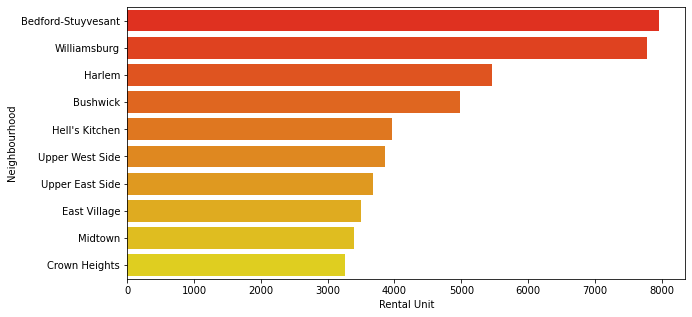

In [36]:
#finding out Airbnb top 10 neighbourhoods
plt.figure(figsize=(10,5))
sns.barplot(x=df['neighbourhood'].value_counts()[0:10], 
            y=df['neighbourhood'].value_counts().index[0:10], palette='autumn')
plt.xlabel('Rental Unit')
plt.ylabel('Neighbourhood')
plt.show()

## Step 5: Export the clean data to a databa

In [44]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('airbnb_python.db')
df2 = pd.read_csv("airbnb_python.csv")
df2.to_sql('airbnb_python',conn,if_exists='append',index=False)
pd.read_sql('select * from airbnb_python', conn)


,Unnamed: 0,id,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,0,...,2020,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,0,...,2007,142,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,1,...,2005,620,124,3.0,0.0,6/23/2019,0.03,5.0,1.0,352.0
3,3,1002755,Home away from home,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,1,...,2005,368,74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,0,...,2009,204,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205193,102594,6092437,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,0,...,2003,844,169,1.0,0.0,6/23/2019,0.03,3.0,1.0,227.0
205194,102595,6092990,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,1,...,2016,837,167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0
205195,102596,6093542,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,1,...,2009,988,198,3.0,0.0,6/23/2019,0.03,5.0,1.0,342.0
205196,102597,6094094,Big Studio-One Stop from Midtown,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,1,...,2015,546,109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0
